# Métodos numéricos para la valoración de opciones

In [2]:
import numpy as np
from matplotlib import pyplot as plt

**Simulación de trayectoria**

In [220]:
# Parametros
N = 200
dt = 1/512
mu = 0.5
sg = 0.3
B = np.zeros(N)
# Condicion inicial
X0 = 10

In [221]:
B[0] = 0
for i in range(1,N):
    B[i] = B[i-1] - np.sqrt(dt)*np.random.normal()
X = np.zeros(N)
X[0] = X0
for i in range(1,N):
    X[i] = X[i-1] + mu*X[i-1]*dt + sg*X[i-1]*(B[i] - B[i-1])

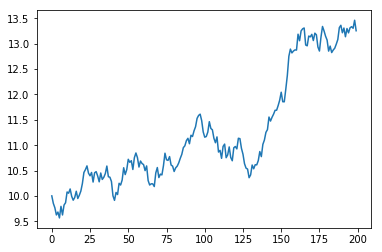

In [222]:
plt.plot(X)
plt.show()

In [223]:
R = np.zeros(N)
# Retornos instantáneos
for j in range(1,N):
        R[j-1] = (X[j] - X[j-1])/X[j-1]

In [224]:
dt = 1/len(R)
media = np.mean(R)
varianza = np.var(R)
mu = media/dt
sigma = varianza/dt
print('mu: '+str(mu)+'\n'+'sigma: '+str(sigma))

mu: 0.2976372595572569
sigma: 0.031084471883691955


**Precio de ejercicio**

In [225]:
k = 1000 # Numero de trayectorias
T = 252 # Periodo de maduración
S = np.zeros((k,T))
for i in range(k):
    S[i,0] = X[-1]
for i in range(k):
    for j in range(1,T):
        S[i,j] = S[i, j-1] + mu*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

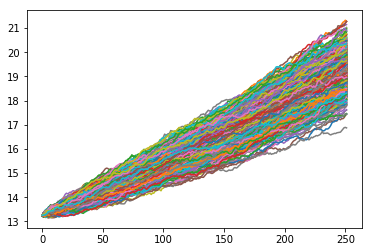

In [226]:
plt.plot(np.matrix(S).T)
plt.show()

In [197]:
K = 15 # Precio de ejercicio

## Simulación Montecarlo

In [227]:
S0 = X[-1]
r = 0.05 # La tasa de interes libre de riesgo
dt = 1/300
for i in range(k):
    for j in range(1,T):
        S[i,j] = S[i, j-1] + r*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

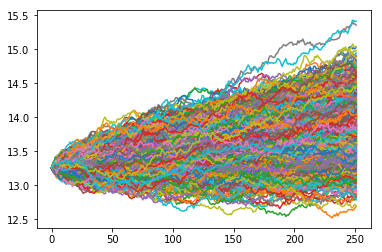

In [228]:
plt.plot(np.matrix(S).T)
plt.show()

**Payoff**

In [229]:
pa = np.zeros(k)
for i in range(k):
    pa[i] = np.maximum(S[i,-1]-K,0)

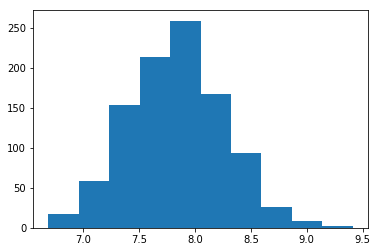

In [230]:
plt.hist(pa)
plt.show()

In [232]:
media = np.mean(pa)
opcion = np.exp(-r)*media
print(opcion)

7.449997545201809


## Árboles binomiales

In [233]:
n = 50
dt = 1/50
u = np.exp(sigma*np.sqrt(dt)) # Proporción de subida
d = 1/u # Proporción de bajada
p = (np.exp(r*dt)-d)/(u-d) # Probabilidad de salto

In [235]:
A = np.zeros((n+1,n+1))
A[0,0] = S0

In [236]:
for i in range(1,n+1):
    for j in range(i+1):
        A[i,j] = S0*(u**(i-j))*(d**j)

In [237]:
f = np.zeros_like(A)
for j in range(n+1):
    f[n,j] = np.maximum(S0*(u**(n-j))*(d**(j)) - K,0)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        f[i,j] = np.exp(-r*dt)*(p*f[i+1,j+1] + (1-p)*f[i+1,j])

In [238]:
f[0,0]

6.2986851767098715